# Import libraries dan data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from pivottablejs import pivot_ui

from lightgbm import LGBMClassifier, plot_importance

In [2]:
# Memuat data
df = pd.read_csv('data_train_dqlab.csv')
df

,employee_id,department,region,education,gender,job_level,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,senior,sourcing,1,35,5.0,8,0,49,5,0.88,0
1,65141,Operations,region_22,Bachelor's,m,middle,other,1,30,5.0,4,0,60,1,0.31,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,middle,sourcing,1,34,3.0,7,0,50,5,3.10,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,senior,other,2,39,1.0,10,0,50,4,0.64,0
4,48945,Technology,region_26,Bachelor's,m,senior,other,1,45,3.0,2,0,73,2,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,53478,Legal,region_2,Below Secondary,m,junior,sourcing,1,24,3.0,1,0,61,4,0.61,0
78294,25600,Technology,region_25,Bachelor's,m,middle,sourcing,1,31,3.0,7,0,74,2,1.47,0
78295,45409,HR,region_16,Bachelor's,f,junior,sourcing,1,26,4.0,4,0,50,1,2.62,0
78296,1186,Procurement,region_31,Bachelor's,m,middle,sourcing,3,27,NaN,1,0,70,3,1.98,0


## Dataset Overview
|        Kolom         |                                         Deskripsi                                           |
|:--------------------:|:-------------------------------------------------------------------------------------------:|
| employee_id          | Unique ID untuk Karyawan                                                                    |
| department           | Department tempat Karyawan                                                                  |
| region               | Region of employment (Tidak Teratur)                                                        |
| education            | Tingkat Pendidikan                                                                          |
| gender               | Jenis Kelamin dari Karyawan                                                                 |
| job_level            | Job Level di posisi terkini                                                                 | 
| recruitment_channel  | Sumber recruitment karyawan                                                                 |
| no_of_trainings      | Jumlah pelatihan yang pernah diikuti                                                        |
| age                  | Usia Karyawan                                                                               |
| previous_year_rating | Rating karyawan tahun sebelumnya                                                            |
| length_of_service    | Lama kerja karyawan                                                                         |
| awards_won?          | Pernah mendapatkan penghargaan ( ya : 1, Tidak : 0 )                                        |
| avg_training_score   | Nilai rata-rata pelatihan saat ini                                                          |
| satisfaction_score   | Nilai kepuasan karyawan terhadap perusahaan                                                 |
| engagement_score     | Nilai rata-rata karyawan merasa keterikatan dengan Perusahaan                               |
| is_promoted          | Recommended for promotion                                                                   |

# Data Preprocessing

In [3]:
# Melihat ada tidaknya kolom bernilai NaN atau Null 
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               3443
gender                     0
job_level                  0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    5936
length_of_service          0
awards_won?                0
avg_training_score         0
satisfaction_score         0
engagement_score           0
is_promoted                0
dtype: int64

In [4]:
# Kita memiliki banyak data, specifically over 10000
# Oleh karena itu, saya memutuskan untuk drop rows yang NaN atau Null
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,employee_id,department,region,education,gender,job_level,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,senior,sourcing,1,35,5.0,8,0,49,5,0.88,0
1,65141,Operations,region_22,Bachelor's,m,middle,other,1,30,5.0,4,0,60,1,0.31,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,middle,sourcing,1,34,3.0,7,0,50,5,3.10,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,senior,other,2,39,1.0,10,0,50,4,0.64,0
4,48945,Technology,region_26,Bachelor's,m,senior,other,1,45,3.0,2,0,73,2,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69474,47537,Sales & Marketing,region_20,Bachelor's,m,middle,other,1,28,4.0,2,0,51,4,0.66,0
69475,53478,Legal,region_2,Below Secondary,m,junior,sourcing,1,24,3.0,1,0,61,4,0.61,0
69476,25600,Technology,region_25,Bachelor's,m,middle,sourcing,1,31,3.0,7,0,74,2,1.47,0
69477,45409,HR,region_16,Bachelor's,f,junior,sourcing,1,26,4.0,4,0,50,1,2.62,0


In [5]:
# Kolom 'employee_id' tidak penting, maka saya drop
df.drop(columns=['employee_id'], inplace=True)
df

,department,region,education,gender,job_level,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,senior,sourcing,1,35,5.0,8,0,49,5,0.88,0
1,Operations,region_22,Bachelor's,m,middle,other,1,30,5.0,4,0,60,1,0.31,0
2,Sales & Marketing,region_19,Bachelor's,m,middle,sourcing,1,34,3.0,7,0,50,5,3.10,0
3,Sales & Marketing,region_23,Bachelor's,m,senior,other,2,39,1.0,10,0,50,4,0.64,0
4,Technology,region_26,Bachelor's,m,senior,other,1,45,3.0,2,0,73,2,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69474,Sales & Marketing,region_20,Bachelor's,m,middle,other,1,28,4.0,2,0,51,4,0.66,0
69475,Legal,region_2,Below Secondary,m,junior,sourcing,1,24,3.0,1,0,61,4,0.61,0
69476,Technology,region_25,Bachelor's,m,middle,sourcing,1,31,3.0,7,0,74,2,1.47,0
69477,HR,region_16,Bachelor's,f,junior,sourcing,1,26,4.0,4,0,50,1,2.62,0


# Interactive Pivot Table

In [6]:
def pivot_ui(df, **kwargs):
    import pivottablejs
    class _DataFrame(pd.DataFrame):
        def to_csv(self, **kwargs):
            return super().to_csv(**kwargs).replace("\r\n", "\n")
    return pivottablejs.pivot_ui(_DataFrame(df), **kwargs)

pivot_ui(df)

In [7]:
# Saya ubah kolom 'gender' menjadi binary
df['gender_num'] = pd.Series()
df.loc[df['gender'] == 'f', 'gender_num'] = 0
df.loc[df['gender'] == 'm', 'gender_num'] = 1
df = df.astype({'gender_num' : 'int'})
df.drop(columns=['gender'], inplace=True)
df

,department,region,education,job_level,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,is_promoted,gender_num
0,Sales & Marketing,region_7,Master's & above,senior,sourcing,1,35,5.0,8,0,49,5,0.88,0,0
1,Operations,region_22,Bachelor's,middle,other,1,30,5.0,4,0,60,1,0.31,0,1
2,Sales & Marketing,region_19,Bachelor's,middle,sourcing,1,34,3.0,7,0,50,5,3.10,0,1
3,Sales & Marketing,region_23,Bachelor's,senior,other,2,39,1.0,10,0,50,4,0.64,0,1
4,Technology,region_26,Bachelor's,senior,other,1,45,3.0,2,0,73,2,0.95,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69474,Sales & Marketing,region_20,Bachelor's,middle,other,1,28,4.0,2,0,51,4,0.66,0,1
69475,Legal,region_2,Below Secondary,junior,sourcing,1,24,3.0,1,0,61,4,0.61,0,1
69476,Technology,region_25,Bachelor's,middle,sourcing,1,31,3.0,7,0,74,2,1.47,0,1
69477,HR,region_16,Bachelor's,junior,sourcing,1,26,4.0,4,0,50,1,2.62,0,0


## Comment
DataFrame bernama 'df' telah kita pre-processing
tidak ada nilai NaN atau Null , sehingga bagus untuk machine learning.

# Data Visualization

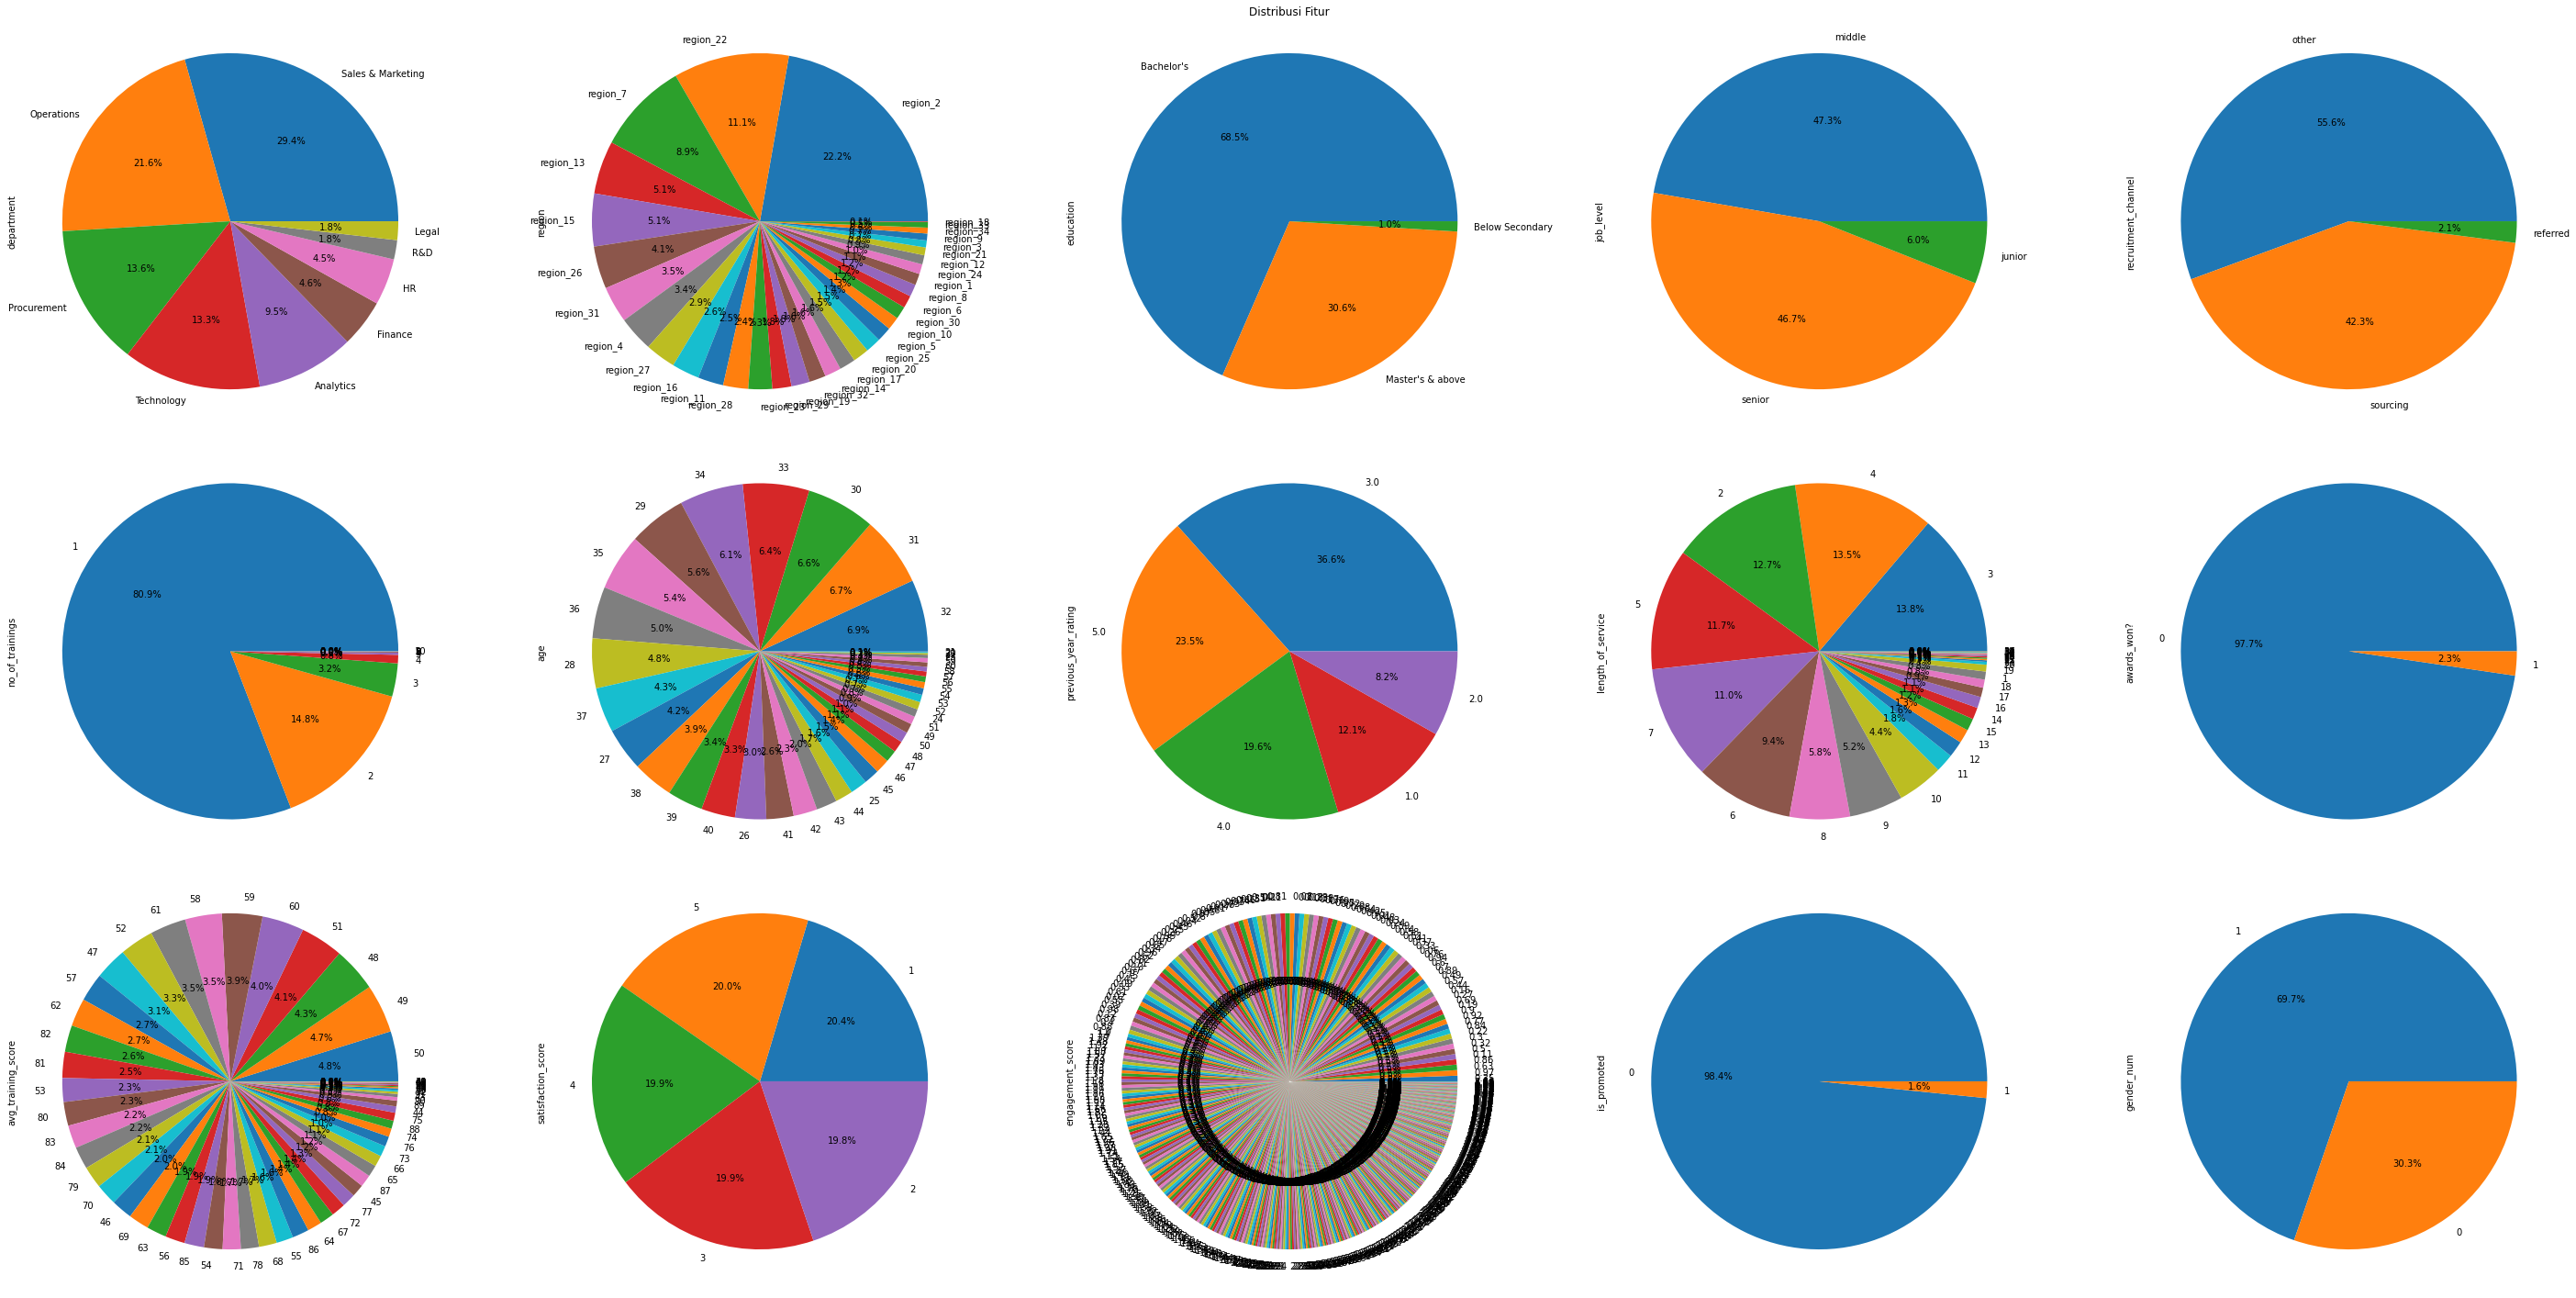

In [8]:
# Melihat distribusi fitur untuk training dengan pie chart
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(40, 20))

for i, feature in enumerate(df.columns):
    row = int(i/5)
    col = i%5
    pd.Series.value_counts(df.iloc[:, i]).plot.pie(autopct="%.1f%%", ax=axs[row][col])

plt.suptitle('Distribusi Fitur')
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

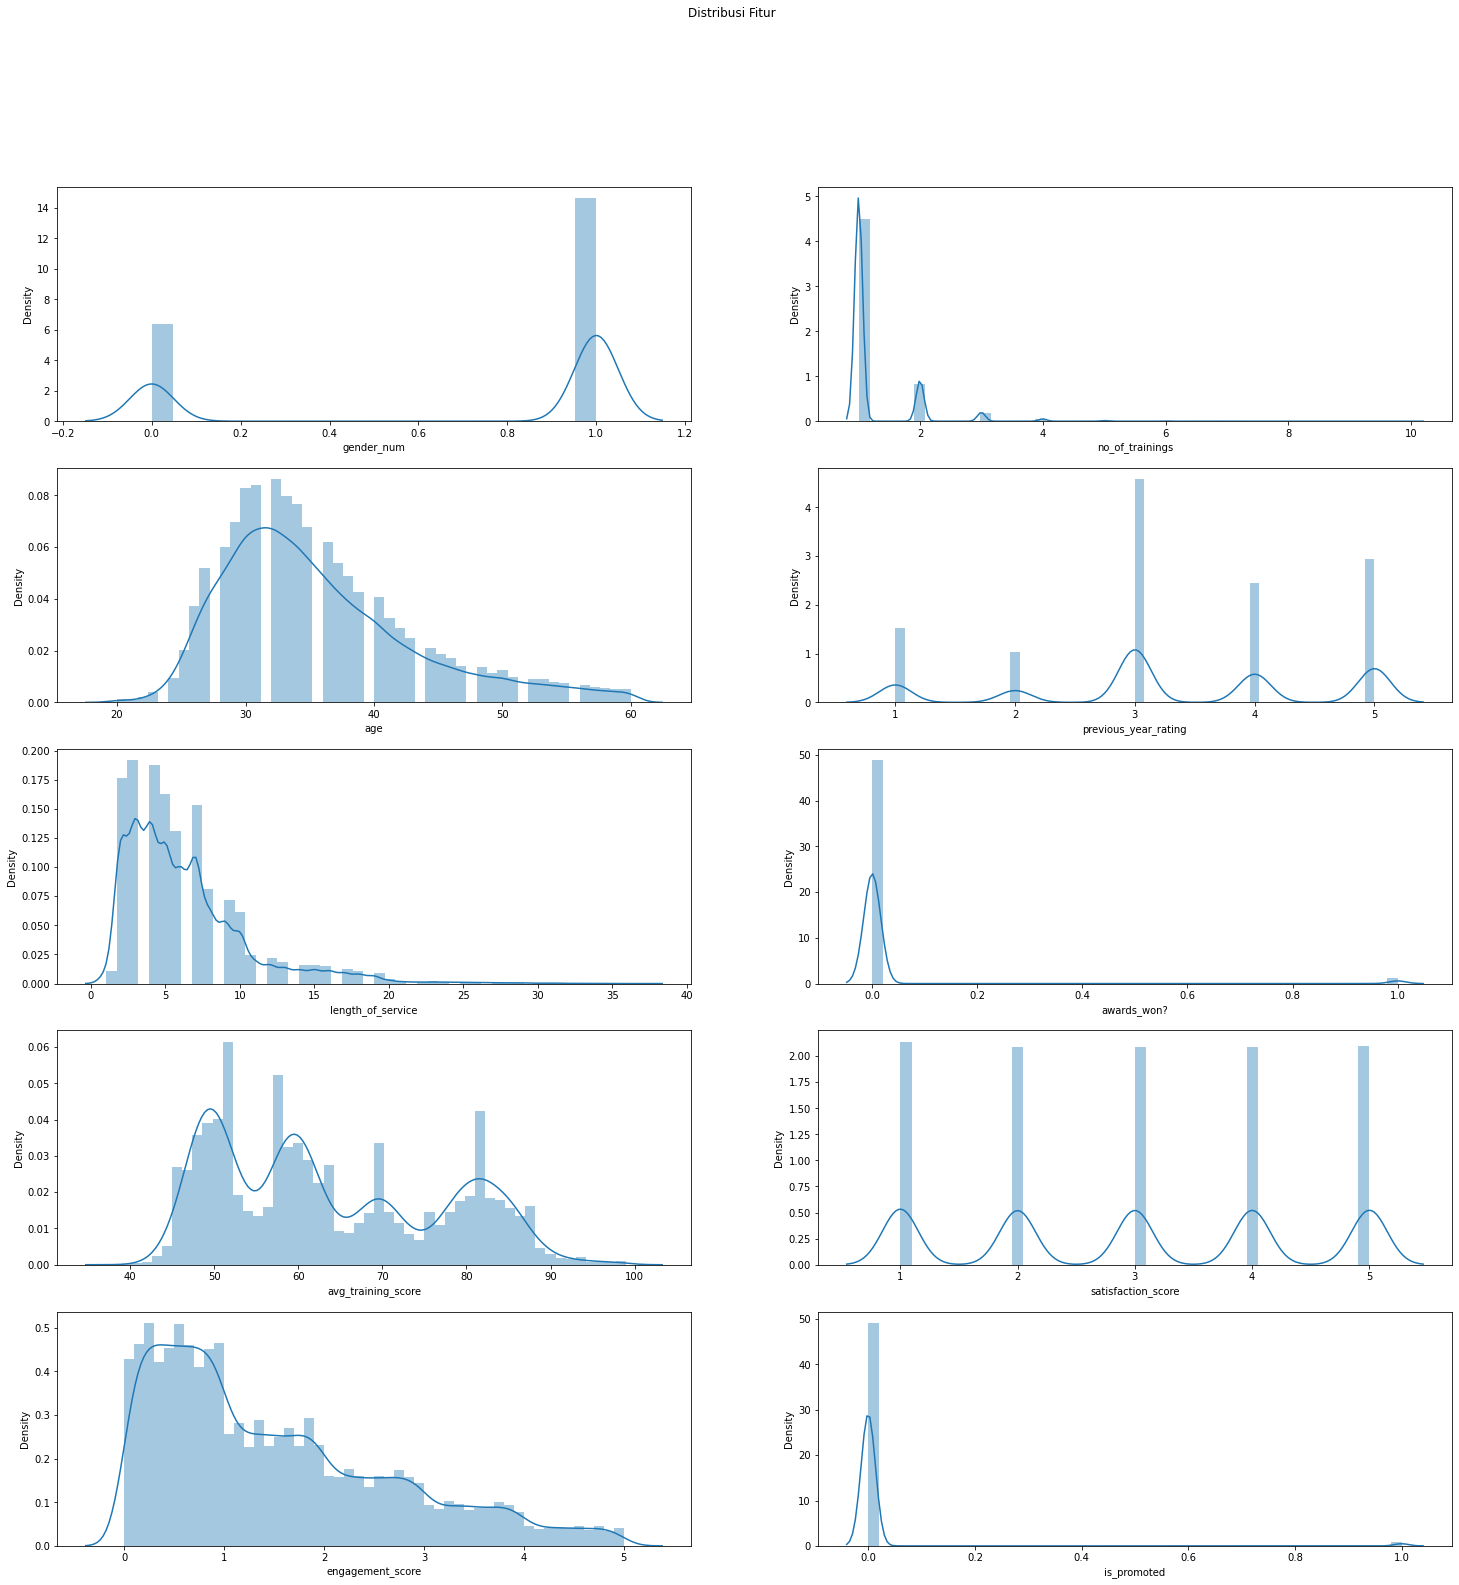

In [9]:
# Melihat distribusi fitur dengan distplot
columns = ['gender_num', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score', 'satisfaction_score', 'engagement_score', 'is_promoted']
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(25,25))

for i, feature in enumerate(df[columns]):
    row = int(i/2)
    col = i%2
    sns.distplot(df[columns].iloc[:, i], ax=axs[row][col])

plt.suptitle('Distribusi Fitur')
plt.tight_layout

## Comment
Seperti yang terlihat di atas, tidak ada kolom yang memiliki distribusi normal yang layak untuk training  
Maka, Kita bisa mencoba mengubah kolom tersebut ke distribusi normal: 'age', 'length_of_service', 'engagement_score'dan 'avg_training_score' 

In [10]:
df

,department,region,education,job_level,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,is_promoted,gender_num
0,Sales & Marketing,region_7,Master's & above,senior,sourcing,1,35,5.0,8,0,49,5,0.88,0,0
1,Operations,region_22,Bachelor's,middle,other,1,30,5.0,4,0,60,1,0.31,0,1
2,Sales & Marketing,region_19,Bachelor's,middle,sourcing,1,34,3.0,7,0,50,5,3.10,0,1
3,Sales & Marketing,region_23,Bachelor's,senior,other,2,39,1.0,10,0,50,4,0.64,0,1
4,Technology,region_26,Bachelor's,senior,other,1,45,3.0,2,0,73,2,0.95,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69474,Sales & Marketing,region_20,Bachelor's,middle,other,1,28,4.0,2,0,51,4,0.66,0,1
69475,Legal,region_2,Below Secondary,junior,sourcing,1,24,3.0,1,0,61,4,0.61,0,1
69476,Technology,region_25,Bachelor's,middle,sourcing,1,31,3.0,7,0,74,2,1.47,0,1
69477,HR,region_16,Bachelor's,junior,sourcing,1,26,4.0,4,0,50,1,2.62,0,0


In [11]:
# Log Transformasi
age_log = np.log1p(df['age'])
service_log = np.log1p(df['length_of_service'])
score_log = np.log1p(df['avg_training_score'])
engagement_log = np.log1p(df['engagement_score'])

df.insert(7, 'age_log', age_log)
df.insert(10, 'length_of_service_log', service_log)
df.insert(13, 'avg_training_score_log', score_log)
df.insert(16, 'engagement_score_log', engagement_log)

df

,department,region,education,job_level,recruitment_channel,no_of_trainings,age,age_log,previous_year_rating,length_of_service,length_of_service_log,awards_won?,avg_training_score,avg_training_score_log,satisfaction_score,engagement_score,engagement_score_log,is_promoted,gender_num
0,Sales & Marketing,region_7,Master's & above,senior,sourcing,1,35,3.583519,5.0,8,2.197225,0,49,3.912023,5,0.88,0.631272,0,0
1,Operations,region_22,Bachelor's,middle,other,1,30,3.433987,5.0,4,1.609438,0,60,4.110874,1,0.31,0.270027,0,1
2,Sales & Marketing,region_19,Bachelor's,middle,sourcing,1,34,3.555348,3.0,7,2.079442,0,50,3.931826,5,3.10,1.410987,0,1
3,Sales & Marketing,region_23,Bachelor's,senior,other,2,39,3.688879,1.0,10,2.397895,0,50,3.931826,4,0.64,0.494696,0,1
4,Technology,region_26,Bachelor's,senior,other,1,45,3.828641,3.0,2,1.098612,0,73,4.304065,2,0.95,0.667829,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69474,Sales & Marketing,region_20,Bachelor's,middle,other,1,28,3.367296,4.0,2,1.098612,0,51,3.951244,4,0.66,0.506818,0,1
69475,Legal,region_2,Below Secondary,junior,sourcing,1,24,3.218876,3.0,1,0.693147,0,61,4.127134,4,0.61,0.476234,0,1
69476,Technology,region_25,Bachelor's,middle,sourcing,1,31,3.465736,3.0,7,2.079442,0,74,4.317488,2,1.47,0.904218,0,1
69477,HR,region_16,Bachelor's,junior,sourcing,1,26,3.295837,4.0,4,1.609438,0,50,3.931826,1,2.62,1.286474,0,0


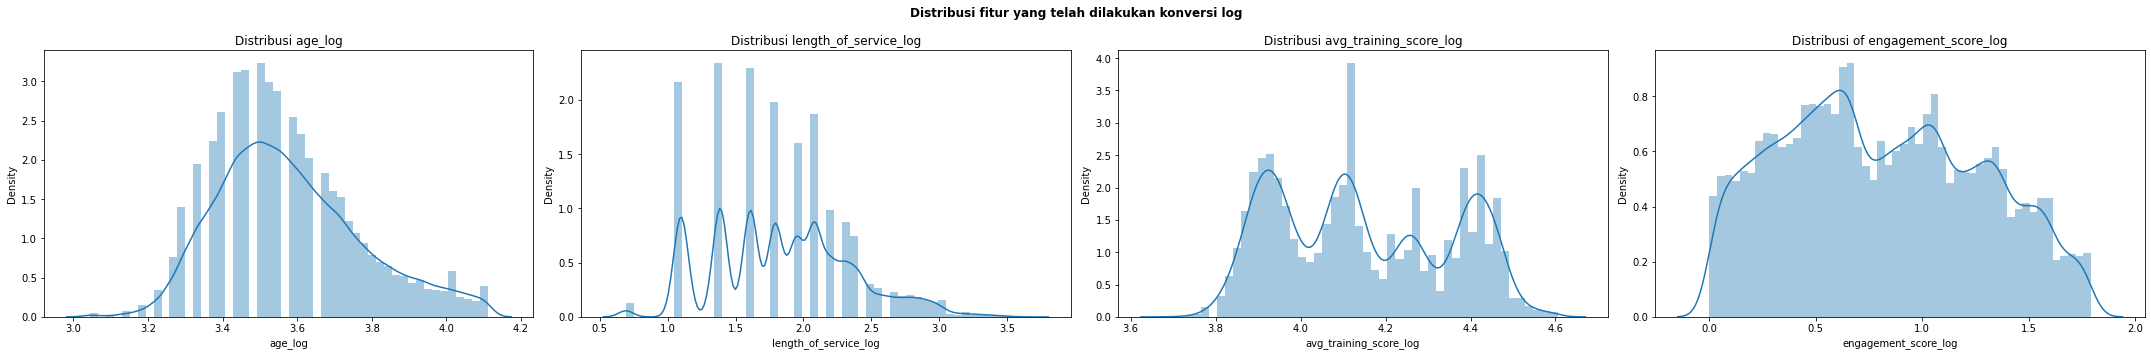

In [12]:
# Cek distribusi kolom yang telah dilakukan konversi log
log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log', 'engagement_score_log']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))

sns.distplot(df['age_log'], ax=ax1)
ax1.set_title('Distribusi age_log')
sns.distplot(df['length_of_service_log'], ax=ax2)
ax2.set_title('Distribusi length_of_service_log')
sns.distplot(df['avg_training_score_log'], ax=ax3)
ax3.set_title('Distribusi avg_training_score_log')
sns.distplot(df['engagement_score_log'], ax=ax4)
ax4.set_title('Distribusi of engagement_score_log')

plt.suptitle('Distribusi fitur yang telah dilakukan konversi log', fontweight='bold')
plt.tight_layout()
plt.show()

## Comment
'age_log' mendekati distribusi normal tapi fitur lain tidak

Dengan transformasi log kita bisa mempersiapkan training

<AxesSubplot:title={'center':'Korelasi Fitur'}>

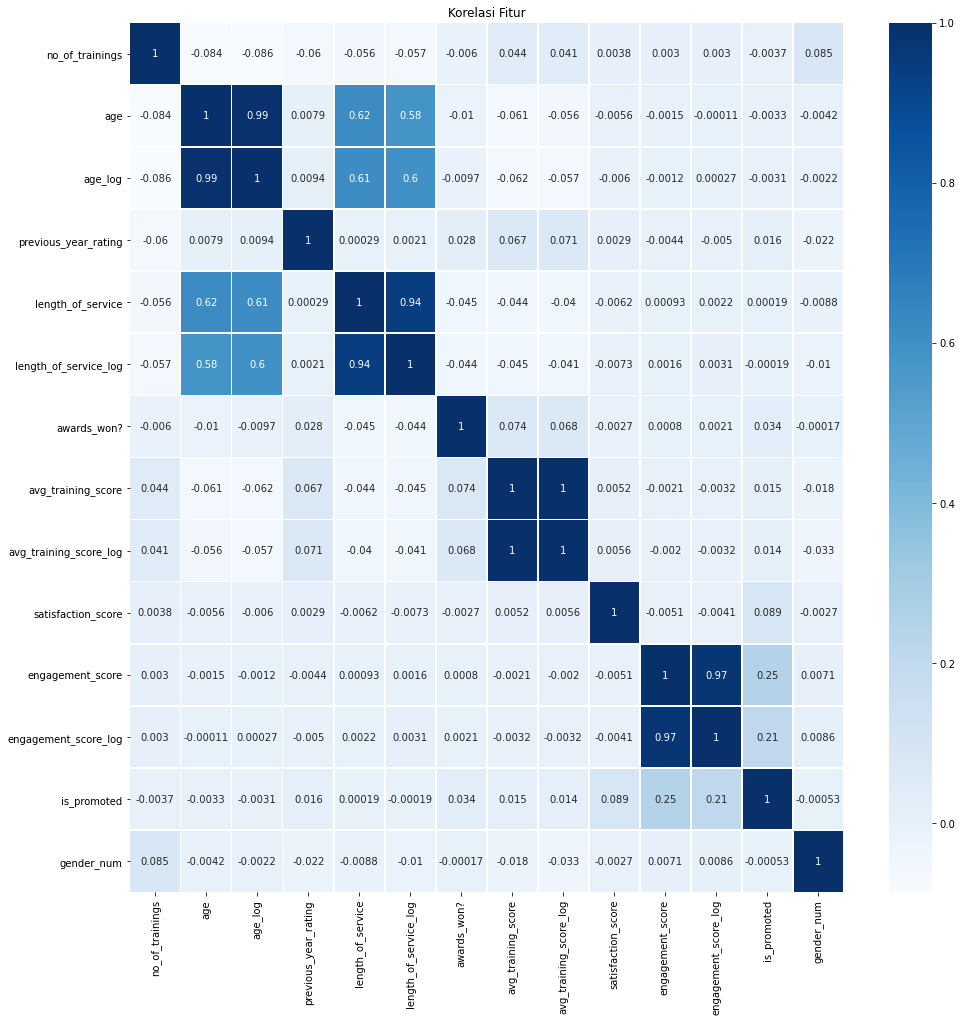

In [13]:
# Heatmap Korelasi
plt.figure(figsize=(16, 16))
plt.title('Korelasi Fitur')
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="Blues")

## Comment
'age' dan 'length of service' memiliki korelasi cukup tinggi
jadi mungkin akan saya dekomposisi

# Split Datasets

In [14]:
# Mendapatkan one hot encoded df
df_oh = pd.get_dummies(df)
df_oh

,no_of_trainings,age,age_log,previous_year_rating,length_of_service,length_of_service_log,awards_won?,avg_training_score,avg_training_score_log,satisfaction_score,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,job_level_junior,job_level_middle,job_level_senior,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,3.583519,5.0,8,2.197225,0,49,3.912023,5,...,0,0,0,1,0,0,1,0,0,1
1,1,30,3.433987,5.0,4,1.609438,0,60,4.110874,1,...,0,1,0,0,0,1,0,1,0,0
2,1,34,3.555348,3.0,7,2.079442,0,50,3.931826,5,...,0,1,0,0,0,1,0,0,0,1
3,2,39,3.688879,1.0,10,2.397895,0,50,3.931826,4,...,0,1,0,0,0,0,1,1,0,0
4,1,45,3.828641,3.0,2,1.098612,0,73,4.304065,2,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69474,1,28,3.367296,4.0,2,1.098612,0,51,3.951244,4,...,0,1,0,0,0,1,0,1,0,0
69475,1,24,3.218876,3.0,1,0.693147,0,61,4.127134,4,...,0,0,1,0,1,0,0,0,0,1
69476,1,31,3.465736,3.0,7,2.079442,0,74,4.317488,2,...,0,1,0,0,0,1,0,0,0,1
69477,1,26,3.295837,4.0,4,1.609438,0,50,3.931826,1,...,0,1,0,0,1,0,0,0,0,1


In [15]:
# Skaling fitur
features = np.array(df_oh.columns).reshape(-1, 1)

for feature in features:
    scaler = StandardScaler()
    scaler.fit(df_oh[feature])
    df_oh[feature] = scaler.transform(df_oh[feature])

df_oh

,no_of_trainings,age,age_log,previous_year_rating,length_of_service,length_of_service_log,awards_won?,avg_training_score,avg_training_score_log,satisfaction_score,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,job_level_junior,job_level_middle,job_level_senior,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.418202,-0.078200,0.017303,1.317643,0.406743,0.677061,-0.154118,-1.096086,-1.159590,1.415365,...,-0.08137,-1.473567,-0.099344,1.507592,-0.252718,-0.94723,1.068227,-1.119259,-0.144756,1.167024
1,-0.418202,-0.740989,-0.749924,1.317643,-0.548410,-0.472963,-0.154118,-0.267568,-0.177403,-1.405054,...,-0.08137,0.678626,-0.099344,-0.663309,-0.252718,1.05571,-0.936130,0.893449,-0.144756,-0.856880
2,-0.418202,-0.210758,-0.127238,-0.270652,0.167955,0.446614,-0.154118,-1.020766,-1.061778,1.415365,...,-0.08137,0.678626,-0.099344,-0.663309,-0.252718,1.05571,-0.936130,-1.119259,-0.144756,1.167024
3,1.242820,0.452031,0.557893,-1.858946,0.884320,1.069679,-0.154118,-1.020766,-1.061778,0.710260,...,-0.08137,0.678626,-0.099344,-0.663309,-0.252718,-0.94723,1.068227,0.893449,-0.144756,-0.856880
4,-0.418202,1.247377,1.274993,-0.270652,-1.025987,-1.472410,-0.154118,0.711589,0.776829,-0.699949,...,-0.08137,0.678626,-0.099344,-0.663309,-0.252718,-0.94723,1.068227,0.893449,-0.144756,-0.856880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69474,-0.418202,-1.006105,-1.092108,0.523495,-1.025987,-1.472410,-0.154118,-0.945446,-0.965866,0.710260,...,-0.08137,0.678626,-0.099344,-0.663309,-0.252718,1.05571,-0.936130,0.893449,-0.144756,-0.856880
69475,-0.418202,-1.536336,-1.853631,-0.270652,-1.264775,-2.265716,-0.154118,-0.192248,-0.097087,0.710260,...,-0.08137,-1.473567,10.066056,-0.663309,3.956973,-0.94723,-0.936130,-1.119259,-0.144756,1.167024
69476,-0.418202,-0.608431,-0.587025,-0.270652,0.167955,0.446614,-0.154118,0.786909,0.843130,-0.699949,...,-0.08137,0.678626,-0.099344,-0.663309,-0.252718,1.05571,-0.936130,-1.119259,-0.144756,1.167024
69477,-0.418202,-1.271220,-1.458754,0.523495,-0.548410,-0.472963,-0.154118,-1.020766,-1.061778,-1.405054,...,-0.08137,0.678626,-0.099344,-0.663309,3.956973,-0.94723,-0.936130,-1.119259,-0.144756,1.167024


In [16]:
# Mendefinisikan fitur dan label untuk training
train_features = df_oh.drop(columns=['is_promoted'], inplace=False)
train_label = df_oh['is_promoted'].astype(int)

In [17]:
# Split datasets
X_train, X_test, y_train, y_test = train_test_split(train_features, train_label, test_size=0.2, random_state=11)

print('Ukuran X_train: ', X_train.shape)
print('Ukuran X_test: ', X_test.shape)
print('Ukuran y_train: ', y_train.shape)
print('Ukuran y_test: ', y_test.shape)

Ukuran X_train:  (55583, 65)
Ukuran X_test:  (13896, 65)
Ukuran y_train:  (55583,)
Ukuran y_test:  (13896,)


# Classification

## Basic Estimators

In [18]:
# Utilitas fungsi
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="macro")
    recall = recall_score(y_test, pred, average="macro")
    f1 = f1_score(y_test, pred, average="macro")
    roc_auc = roc_auc_score(y_test, pred_proba, average="macro")
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [19]:
# Proses fitting, prediksi dan evaluasi dengan Logistic Regression
# Membuat Estimator CLass
dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier()

# Fitting
dt_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Prediksi
dt_pred = dt_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)

# Pred_Proba
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# Evaluasi
get_clf_eval(y_test, dt_pred, dt_pred_proba)
get_clf_eval(y_test, lr_pred, lr_pred_proba)
get_clf_eval(y_test, rf_pred, rf_pred_proba)

Confusion Matrix
[[13477   187]
 [  167    65]]
Accuracy: 0.9745, Precision: 0.6228, Recall 0.6332, F1: 0.6278, AUC:0.6332
Confusion Matrix
[[13658     6]
 [  220    12]]
Accuracy: 0.9837, Precision: 0.8254, Recall 0.5256, F1: 0.5439, AUC:0.9644
Confusion Matrix
[[13660     4]
 [  223     9]]
Accuracy: 0.9837, Precision: 0.8381, Recall 0.5193, F1: 0.5326, AUC:0.9734


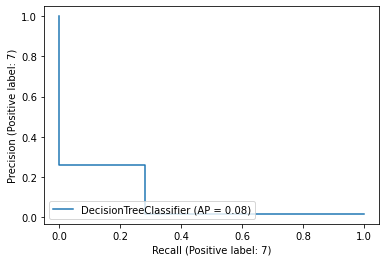

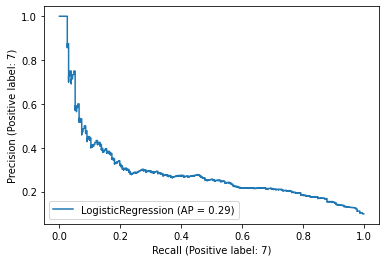

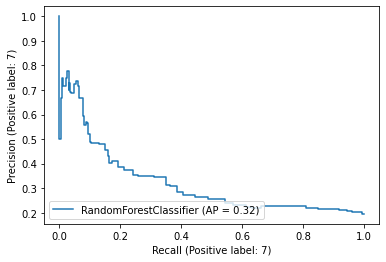

In [20]:
# Plot kurva Precision-Recall
plot_precision_recall_curve(dt_clf, X_test, y_test)
plot_precision_recall_curve(lr_clf, X_test, y_test)
plot_precision_recall_curve(rf_clf, X_test, y_test)
plt.show()

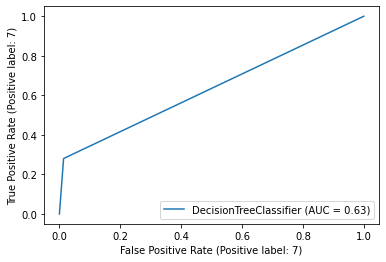

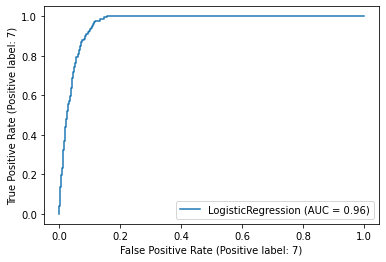

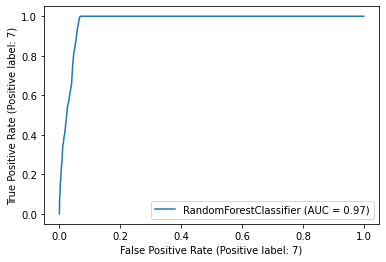

In [21]:
# Plot kurva ROC 
plot_roc_curve(dt_clf, X_test, y_test)
plot_roc_curve(lr_clf, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test)
plt.show()

### Comment
Seperti terlihat di ata, LogisticRegression dan RandomForestClassifier keduanya basic models tapi sangat powerfull

## LightGBM

Confusion Matrix
[[13626    38]
 [  194    38]]
Accuracy: 0.9833, Precision: 0.7430, Recall 0.5805, F1: 0.6192, AUC:0.9737


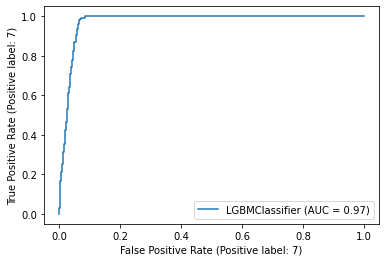

In [22]:
# Membuat estimator dan proses fitting, prediksi dan evaluasi untuk model setelah aplikasi SMOTE
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

lgbm_clf.fit(X_train, y_train)
lgbm_preds_over = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lgbm_preds_over, lgbm_pred_proba)
plot_roc_curve(lgbm_clf, X_test, y_test)

In [23]:
# Membuat estimator dan proses fitting, prediksi dan evaluasi untuk model
lgbm_wrapper = LGBMClassifier(n_estimators=400, num_leaves=64, n_jobs=-1, boost_from_average=False)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=1200, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, preds, pred_proba)

[1]	valid_0's binary_logloss: 0.602997
[2]	valid_0's binary_logloss: 0.529185
[3]	valid_0's binary_logloss: 0.467625
[4]	valid_0's binary_logloss: 0.415635
[5]	valid_0's binary_logloss: 0.37124
[6]	valid_0's binary_logloss: 0.333049
[7]	valid_0's binary_logloss: 0.300049
[8]	valid_0's binary_logloss: 0.271127
[9]	valid_0's binary_logloss: 0.245948
[10]	valid_0's binary_logloss: 0.223707
[11]	valid_0's binary_logloss: 0.204064
[12]	valid_0's binary_logloss: 0.186841
[13]	valid_0's binary_logloss: 0.171395
[14]	valid_0's binary_logloss: 0.1579
[15]	valid_0's binary_logloss: 0.145806
[16]	valid_0's binary_logloss: 0.134964
[17]	valid_0's binary_logloss: 0.125309
[18]	valid_0's binary_logloss: 0.116715
[19]	valid_0's binary_logloss: 0.10895
[20]	valid_0's binary_logloss: 0.102044
[21]	valid_0's binary_logloss: 0.0957839
[22]	valid_0's binary_logloss: 0.0902758
[23]	valid_0's binary_logloss: 0.0852054
[24]	valid_0's binary_logloss: 0.0807624
[25]	valid_0's binary_logloss: 0.0766674
[26]	val

[210]	valid_0's binary_logloss: 0.0478638
[211]	valid_0's binary_logloss: 0.0479297
[212]	valid_0's binary_logloss: 0.0479883
[213]	valid_0's binary_logloss: 0.0480483
[214]	valid_0's binary_logloss: 0.048111
[215]	valid_0's binary_logloss: 0.0481738
[216]	valid_0's binary_logloss: 0.0481955
[217]	valid_0's binary_logloss: 0.0482867
[218]	valid_0's binary_logloss: 0.0483934
[219]	valid_0's binary_logloss: 0.0484194
[220]	valid_0's binary_logloss: 0.0484494
[221]	valid_0's binary_logloss: 0.048487
[222]	valid_0's binary_logloss: 0.0485073
[223]	valid_0's binary_logloss: 0.0486123
[224]	valid_0's binary_logloss: 0.0486409
[225]	valid_0's binary_logloss: 0.0486983
[226]	valid_0's binary_logloss: 0.0487298
[227]	valid_0's binary_logloss: 0.0488105
[228]	valid_0's binary_logloss: 0.0488867
[229]	valid_0's binary_logloss: 0.0489889
[230]	valid_0's binary_logloss: 0.0489981
[231]	valid_0's binary_logloss: 0.0490971
[232]	valid_0's binary_logloss: 0.0491978
[233]	valid_0's binary_logloss: 0.04

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

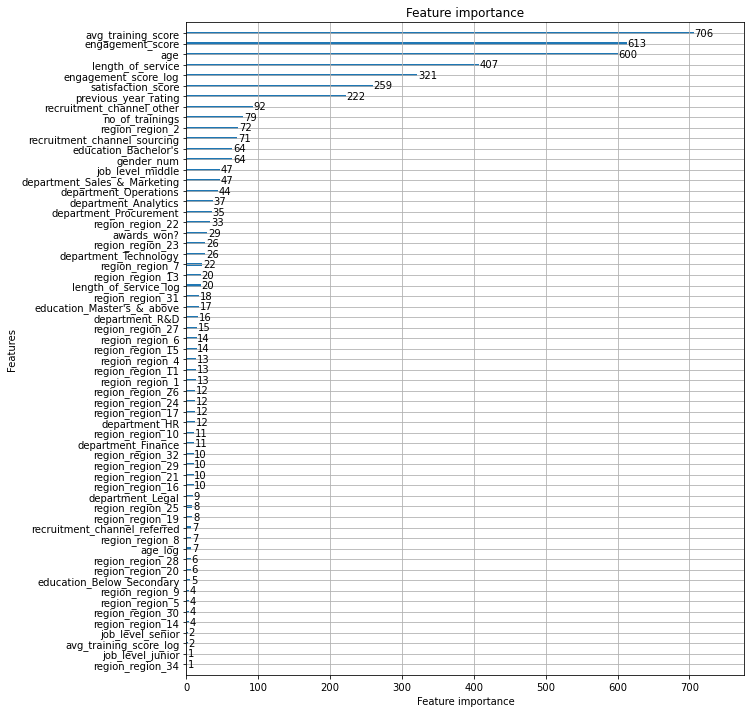

In [24]:
# Plot Fitur penting
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

### Comment
LightGBM juga merupakan model yang powerfull yang berjalan dengan Boosting (Boot Strapping)
Lebih ringan dari GradientBoostingClassifier  


## Stacking Ensemble

In [25]:
# Membuat ML model individual
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=11)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# Membuat model yang akan fit dengan dataset stacking proses
lr_final = LogisticRegression(C=10)

In [26]:
# Fitting tiap models
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [27]:
# Prediksi tiap model dan prediksi mereka

knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('Nilai Akurasi KNN: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('Nilai Akurasi RandomForestClassifier: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('Nilai Akurasi DeicisionTreeClassifier: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('Nilai Akurasi AdaBoostClassifier: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

Nilai Akurasi KNN: 0.9833
Nilai Akurasi RandomForestClassifier: 0.9837
Nilai Akurasi DeicisionTreeClassifier: 0.9747
Nilai Akurasi AdaBoostClassifier: 0.9841


In [28]:
# Menyatukan prediksi menjadi satu ndarray
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# Transponse 'pred' secara berurut untuk diubah menjadi fitur
pred = np.transpose(pred)
print(pred.shape)

(4, 13896)
(13896, 4)


In [29]:
# Fit, Prediksi, Evaluasi untuk model final
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('Nilai Akurasi Model Final: {0:.4f}'.format(accuracy_score(y_test, final)))

Nilai Akurasi Model Final: 0.9839


# Conclusion
**Nilai Akurasi Model Final: 0.9839**

1. Dengan estimator training basic, model LightGBM dan ensemble, saya bisa mencoba banyak estimator untuk dataset ini.  
2. Terutama, label untuk training menggunakan binary (0 atau 1) sehingga, nilai evaluasi tampak lebih tinggi dibandingkan yang menggunakan multi-klasifikasi.  
3. Model ensemble dan nearest-neighbor jadi berbeda, karenanya, visual scatter plot cjugamerupakan langkah yang baik untuk analisa data.
